In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression

# Study data files
flu_data_path = "flu_data_3.csv"

#read data
flu_data= pd.read_csv(flu_data_path)

#display data
flu_data

,REGION TYPE,REGION,YEAR,WEEK,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,States,Alabama,2020,40,1.111260,32582,773,1146,352,1246,616,408,91,36715
1,States,Alaska,2020,40,1.765280,3010,46,2,1,0,0,54,12,3059
2,States,Arizona,2020,40,1.025000,5949,3629,747,2,97,15,107,24,10439
3,States,Arkansas,2020,40,1.180790,10996,2718,1444,18,35,33,180,53,15244
4,States,California,2020,40,0.849375,27051,9827,6491,5494,5208,3383,488,110,57454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9345,States,Wyoming,2023,52,10.986700,1175,479,101,27,65,28,206,12,1875
9346,States,Commonwealth of the Northern Mariana Islands,2023,52,0.000000,0,0,0,0,0,0,0,0,0
9347,States,Puerto Rico,2023,52,5.761320,1342,36,63,12,2,3,84,5,1458
9348,States,Virgin Islands,2023,52,5.136990,202,273,67,1,31,10,30,2,584


In [55]:
#delete rows not needed
flu_data= flu_data.drop('REGION TYPE', axis=1)

#print
flu_data

,REGION,YEAR,WEEK,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,Alabama,2020,40,1.111260,32582,773,1146,352,1246,616,408,91,36715
1,Alaska,2020,40,1.765280,3010,46,2,1,0,0,54,12,3059
2,Arizona,2020,40,1.025000,5949,3629,747,2,97,15,107,24,10439
3,Arkansas,2020,40,1.180790,10996,2718,1444,18,35,33,180,53,15244
4,California,2020,40,0.849375,27051,9827,6491,5494,5208,3383,488,110,57454
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9345,Wyoming,2023,52,10.986700,1175,479,101,27,65,28,206,12,1875
9346,Commonwealth of the Northern Mariana Islands,2023,52,0.000000,0,0,0,0,0,0,0,0,0
9347,Puerto Rico,2023,52,5.761320,1342,36,63,12,2,3,84,5,1458
9348,Virgin Islands,2023,52,5.136990,202,273,67,1,31,10,30,2,584


In [56]:
state_list= flu_data['REGION'].unique().tolist()
state_list

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'Commonwealth of the Northern Mariana Islands',
 'Puerto Rico',
 'Virgin Islands',
 'New York City']

In [57]:
average_by_state= flu_data.groupby('REGION').mean()

average_by_state

,YEAR,WEEK,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
REGION,,,,,,,,,,,,
Alabama,2021.835294,28.147059,2.370150,24093.929412,10474.670588,5650.270588,2740.829412,1665.670588,1260.058824,1127.141176,100.270588,45885.429412
Alaska,2021.835294,28.147059,1.565107,1760.611765,921.229412,384.023529,252.100000,113.964706,115.811765,57.917647,11.488235,3547.741176
Arizona,2021.835294,28.147059,1.653641,10410.882353,5174.629412,2499.576471,884.911765,431.852941,434.135294,406.411765,38.923529,19835.988235
Arkansas,2021.835294,28.147059,1.877680,7515.111765,3860.947059,1932.052941,965.641176,518.676471,420.000000,294.576471,49.247059,15212.429412
California,2021.835294,28.147059,2.455472,81143.035294,41907.629412,17895.917647,10914.400000,4044.600000,4744.588235,4939.311765,160.288235,160650.170588
Colorado,2021.835294,28.147059,2.388167,21202.141176,11277.929412,5220.652941,2601.517647,1176.135294,1094.282353,1093.176471,84.994118,42572.658824
Commonwealth of the Northern Mariana Islands,2021.835294,28.147059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Connecticut,2021.835294,28.147059,1.722948,20760.664706,12051.852941,5124.223529,2606.441176,1140.123529,1176.729412,768.129412,70.247059,42860.035294
Delaware,2021.835294,28.147059,1.006525,5391.794118,2508.241176,1393.123529,758.688235,315.358824,345.605882,113.435294,18.982353,10712.811765


In [58]:
average_by_state= average_by_state.drop('YEAR', axis=1)
average_by_state

,WEEK,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
REGION,,,,,,,,,,,
Alabama,28.147059,2.370150,24093.929412,10474.670588,5650.270588,2740.829412,1665.670588,1260.058824,1127.141176,100.270588,45885.429412
Alaska,28.147059,1.565107,1760.611765,921.229412,384.023529,252.100000,113.964706,115.811765,57.917647,11.488235,3547.741176
Arizona,28.147059,1.653641,10410.882353,5174.629412,2499.576471,884.911765,431.852941,434.135294,406.411765,38.923529,19835.988235
Arkansas,28.147059,1.877680,7515.111765,3860.947059,1932.052941,965.641176,518.676471,420.000000,294.576471,49.247059,15212.429412
California,28.147059,2.455472,81143.035294,41907.629412,17895.917647,10914.400000,4044.600000,4744.588235,4939.311765,160.288235,160650.170588
Colorado,28.147059,2.388167,21202.141176,11277.929412,5220.652941,2601.517647,1176.135294,1094.282353,1093.176471,84.994118,42572.658824
Commonwealth of the Northern Mariana Islands,28.147059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Connecticut,28.147059,1.722948,20760.664706,12051.852941,5124.223529,2606.441176,1140.123529,1176.729412,768.129412,70.247059,42860.035294
Delaware,28.147059,1.006525,5391.794118,2508.241176,1393.123529,758.688235,315.358824,345.605882,113.435294,18.982353,10712.811765


In [59]:
average_by_state= average_by_state.drop('WEEK', axis=1)
average_by_state

,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
REGION,,,,,,,,,,
Alabama,2.370150,24093.929412,10474.670588,5650.270588,2740.829412,1665.670588,1260.058824,1127.141176,100.270588,45885.429412
Alaska,1.565107,1760.611765,921.229412,384.023529,252.100000,113.964706,115.811765,57.917647,11.488235,3547.741176
Arizona,1.653641,10410.882353,5174.629412,2499.576471,884.911765,431.852941,434.135294,406.411765,38.923529,19835.988235
Arkansas,1.877680,7515.111765,3860.947059,1932.052941,965.641176,518.676471,420.000000,294.576471,49.247059,15212.429412
California,2.455472,81143.035294,41907.629412,17895.917647,10914.400000,4044.600000,4744.588235,4939.311765,160.288235,160650.170588
Colorado,2.388167,21202.141176,11277.929412,5220.652941,2601.517647,1176.135294,1094.282353,1093.176471,84.994118,42572.658824
Commonwealth of the Northern Mariana Islands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Connecticut,1.722948,20760.664706,12051.852941,5124.223529,2606.441176,1140.123529,1176.729412,768.129412,70.247059,42860.035294
Delaware,1.006525,5391.794118,2508.241176,1393.123529,758.688235,315.358824,345.605882,113.435294,18.982353,10712.811765


In [61]:
average_by_state.reset_index('REGION', inplace= True)

average_by_state


,REGION,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,Alabama,2.370150,24093.929412,10474.670588,5650.270588,2740.829412,1665.670588,1260.058824,1127.141176,100.270588,45885.429412
1,Alaska,1.565107,1760.611765,921.229412,384.023529,252.100000,113.964706,115.811765,57.917647,11.488235,3547.741176
2,Arizona,1.653641,10410.882353,5174.629412,2499.576471,884.911765,431.852941,434.135294,406.411765,38.923529,19835.988235
3,Arkansas,1.877680,7515.111765,3860.947059,1932.052941,965.641176,518.676471,420.000000,294.576471,49.247059,15212.429412
4,California,2.455472,81143.035294,41907.629412,17895.917647,10914.400000,4044.600000,4744.588235,4939.311765,160.288235,160650.170588
5,Colorado,2.388167,21202.141176,11277.929412,5220.652941,2601.517647,1176.135294,1094.282353,1093.176471,84.994118,42572.658824
6,Commonwealth of the Northern Mariana Islands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Connecticut,1.722948,20760.664706,12051.852941,5124.223529,2606.441176,1140.123529,1176.729412,768.129412,70.247059,42860.035294
8,Delaware,1.006525,5391.794118,2508.241176,1393.123529,758.688235,315.358824,345.605882,113.435294,18.982353,10712.811765
9,District of Columbia,4.207133,2596.129412,1441.535294,662.129412,314.011765,164.405882,155.852941,233.158824,3.694118,5334.064706


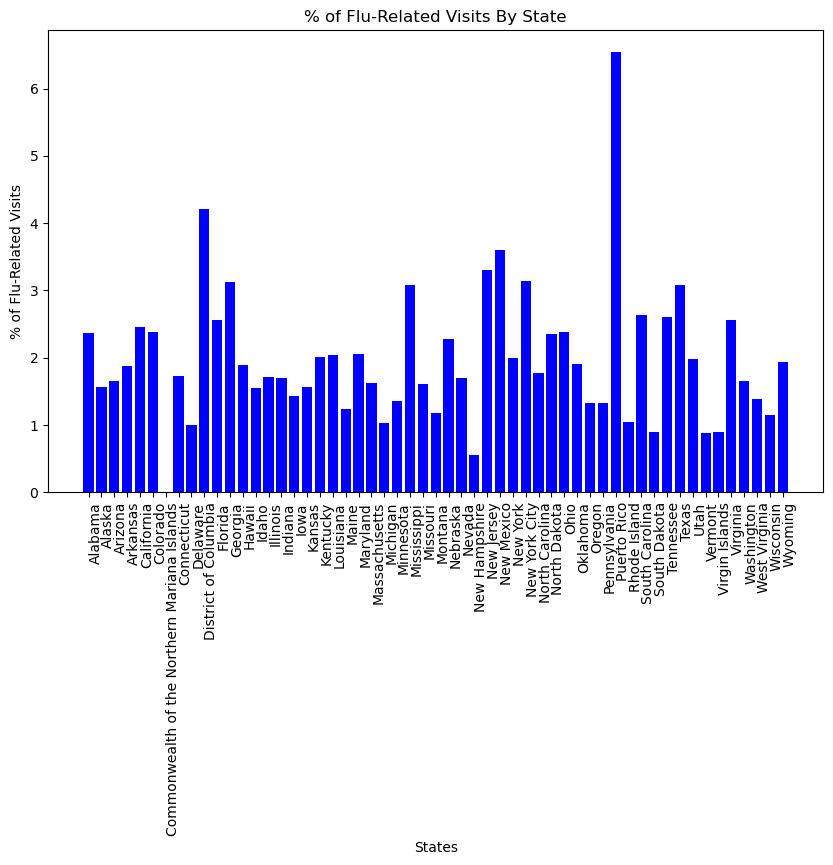

In [67]:
x_values= average_by_state['REGION']
y_values= average_by_state['%UNWEIGHTED ILI']

#create graph
plt.figure(figsize=(10,6))
plt.bar(x_values, y_values, color= 'blue')

#labels
plt.xlabel('States')
plt.ylabel('% of Flu-Related Visits')
plt.title('% of Flu-Related Visits By State')

plt.xticks(rotation=90, ha='right', rotation_mode='anchor')

plt.show()

In [68]:
average_0_4= average_by_state['AGE 0-4'].mean()
average_0_4

17286.9694117647

In [69]:
average_5_24= average_by_state['AGE 5-24'].mean()
average_5_24

2166.851336898396

In [70]:
average_25_49= average_by_state['AGE 25-49'].mean()
average_25_49

8870.37422459893

In [71]:
average_50_64= average_by_state['AGE 50-64'].mean()
average_50_64

1025.480213903743

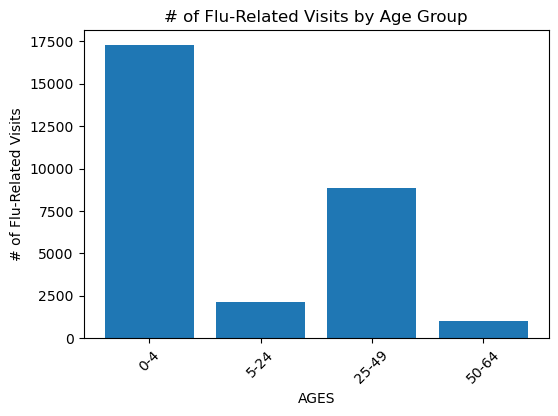

In [74]:
#create bar graph of flur related visits by age group
x_axis= ['0-4', '5-24', '25-49', '50-64']
y_axis= [average_0_4, average_5_24, average_25_49, average_50_64]

plt.figure(figsize=(6,4))
plt.bar(x_axis, y_axis)

#customize
plt.xlabel('AGES')
plt.ylabel('# of Flu-Related Visits')
plt.title('# of Flu-Related Visits by Age Group')
plt.xticks(rotation= 45)

plt.show()